# Analisis de datos Dc Comic

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
columnas_a_usar = [
    'name',
    'ID',
    'ALIGN',
    'SEX',
    'GSM',
    'ALIVE',
    'APPEARANCES',
    'FIRST APPEARANCE'
    ,'YEAR']

contenido_archivo_csv_DCComics = pd.read_csv(
    'dc-data.csv',
    usecols=columnas_a_usar
    )

In [6]:
grupo_personajes_sexo = contenido_archivo_csv_DCComics.groupby("SEX")['name']
total_personajes_sexo = []
tipo_sexo = []

for sexo,personaje in grupo_personajes_sexo:
    tipo_sexo.append(sexo)
    total_personajes_sexo.append(len(personaje))
    
print(total_personajes_sexo)
print(tipo_sexo)

[1967, 20, 4783, 1]
['Female Characters', 'Genderless Characters', 'Male Characters', 'Transgender Characters']


### Total de personajes por su Sexo

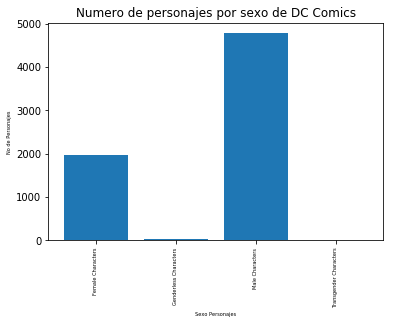

In [7]:
indice = np.arange(len(tipo_sexo))
plt.bar(indice, total_personajes_sexo)
plt.xlabel('Sexo Personajes', fontsize=5)
plt.ylabel('No de Personajes', fontsize=5)
plt.xticks(indice, tipo_sexo, fontsize=5, rotation=90)
plt.title('Numero de personajes por sexo de DC Comics')
plt.show()

In [11]:
grupo_personajes_bando = contenido_archivo_csv_DCComics.groupby(["ALIGN"])['name']
total_personajes_bando = []
tipo_bando = []

for bando,personaje in grupo_personajes_bando:
    tipo_bando.append(bando)
    total_personajes_bando.append(len(personaje))
print(total_personajes_bando)
print(tipo_bando)

[2895, 2832, 565, 3]
['Bad Characters', 'Good Characters', 'Neutral Characters', 'Reformed Criminals']


### Porcentaje de Personajes por Bando

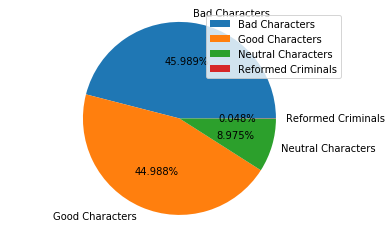

In [13]:
plt.pie(total_personajes_bando,labels=tipo_bando,
autopct='%1.3f%%')
plt.legend(tipo_bando)
plt.axis('equal')
plt.show()

In [14]:
grupo_personajes_bando_sexo = contenido_archivo_csv_DCComics.groupby(["ALIGN","SEX"])['name']
total_personajes_x_bando_sexo = []
bando_sexo = []

for personaje in grupo_personajes_bando_sexo:
    bando_sexo.append(personaje[0][0] + " - " +personaje[0][1])
    total_personajes_x_bando_sexo.append(len(personaje[1]))

### Numero de Personajes por Bando y Sexo

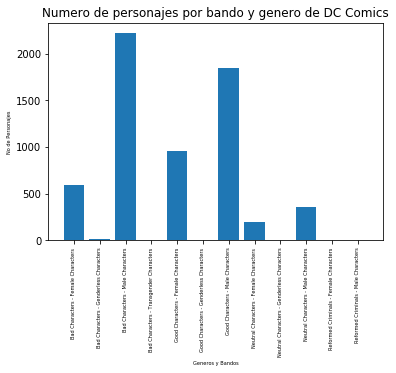

In [15]:
indice = np.arange(len(bando_sexo))
plt.bar(indice, total_personajes_x_bando_sexo)
plt.xlabel('Generos y Bandos', fontsize=5)
plt.ylabel('No de Personajes', fontsize=5)
plt.xticks(indice, bando_sexo, fontsize=5, rotation=90)
plt.title('Numero de personajes por bando y genero de DC Comics')
plt.show()


In [ ]:
grupo_personajes_alive = contenido_archivo_csv_DCComics.groupby(["ALIVE"])['name']
tipo_alive = []
total_personajes_alive = []
for alive,personaje in grupo_personajes_alive:
    tipo_alive.append(alive)
    total_personajes_alive.append(len(personaje))

### Porcentaje de Personajes Vivos y Fallecidos

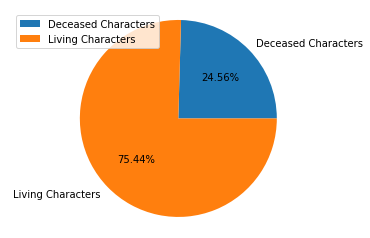

In [20]:
plt.pie(total_personajes_alive,labels=tipo_alive,
autopct='%1.2f%%')
plt.legend(tipo_alive)
plt.axis('equal')
plt.show()

In [22]:
grupo_personajes_gsm = contenido_archivo_csv_DCComics.groupby(["GSM"])['name']
tipo_gsm=[]
total_personajes_gsm=[]

for gsm,personaje in grupo_personajes_gsm:
    tipo_gsm.append(gsm)
    total_personajes_gsm.append(len(personaje))    

### Porcentaje de Personajes Bisexuales y Homosexual

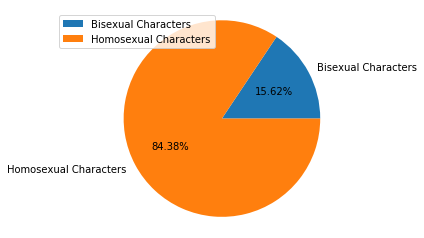

In [24]:
plt.pie(total_personajes_gsm,labels=tipo_gsm,
autopct='%1.2f%%')
plt.legend(tipo_gsm)
plt.axis('equal')
plt.show()

In [27]:
grupo_personajes_sex_gsm = contenido_archivo_csv_DCComics.groupby(["GSM","SEX"])['name']
tipo_gsm_sex=[]
total_personajes_gsm_sex=[]

for tipo,personaje in grupo_personajes_sex_gsm:
    tipo_gsm_sex.append(tipo)
    total_personajes_gsm_sex.append(len(personaje))    

### Porcentaje de Personajes Bisexuales y Homosexuales segun su sexo

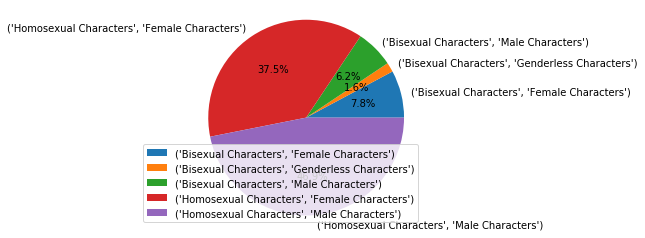

In [28]:
plt.pie(total_personajes_gsm_sex,labels=tipo_gsm_sex,
autopct='%1.1f%%')
plt.legend(tipo_gsm_sex)
plt.axis('equal')
plt.show()

In [67]:
grupo_personajes_anio = contenido_archivo_csv_DCComics.groupby(["YEAR","GSM","SEX"])['name'].apply(list)
df_personaje_anio = pd.DataFrame(grupo_personajes_anio)

total_mecos_90_bisexuales = 0
total_mecos_90_homosexuales = 0
total_mecos_2000_bisexuales = 0
total_mecos_2000_homosexuales = 0
total_mecos_2010_bisexuales = 0
total_mecos_2010_homosexuales = 0
for index,personajes in enumerate(grupo_personajes_anio.items()):
    
    if (personajes[0][0] < 1990): 
        if (personajes[0][1] == 'Bisexual Characters'):
            total_mecos_90_bisexuales = len(personajes[1]) + total_mecos_90_bisexuales
        else:
            total_mecos_90_homosexuales = len(personajes[1]) + total_mecos_90_homosexuales
            
    if (personajes[0][0] > 1990 and personajes[0][0] < 2000): 
        if (personajes[0][1] == 'Bisexual Characters'):
            total_mecos_2000_bisexuales = len(personajes[1]) + total_mecos_2000_bisexuales
        else:
            total_mecos_2000_homosexuales = len(personajes[1]) + total_mecos_2000_homosexuales
    
    if (personajes[0][0] < 2000): 
        if (personajes[0][1] == 'Bisexual Characters'):
            total_mecos_2010_bisexuales = len(personajes[1]) + total_mecos_2010_bisexuales
        else:
            total_mecos_2010_homosexuales = len(personajes[1]) + total_mecos_2010_homosexuales

anios = ['< 1990','1900 - 2000','2000 >',]
datos_personajes_bisexuales = (total_mecos_90_bisexuales,total_mecos_2000_bisexuales,total_mecos_2010_bisexuales)
datos_personajes_homosexuales = (total_mecos_90_homosexuales,total_mecos_2000_homosexuales,total_mecos_2010_homosexuales)

### Numero de Personajes Mecos y Bisexuales por rango de anio

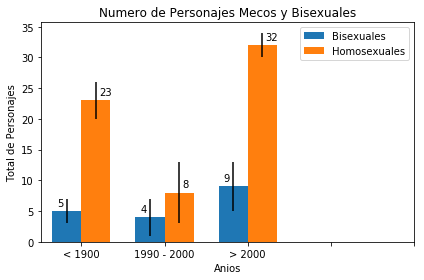

In [75]:
indice = np.arange(len(datos_personajes_bisexuales))
width = 0.35
bisexuales_std = (2, 3, 4)
homosexuales_std =  (3, 5, 2)
fig, ax = plt.subplots()
rects1 = ax.bar(indice - width/2, datos_personajes_bisexuales, width, yerr=bisexuales_std,
                label='Bisexuales')
rects2 = ax.bar(indice + width/2, datos_personajes_homosexuales, width, yerr=homosexuales_std,
                label='Homosexuales')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total de Personajes')
ax.set_xlabel('Anios')
ax.set_title('Numero de Personajes Mecos y Bisexuales')
ax.set_xticks(ind)
ax.set_xticklabels(('< 1900', '1990 - 2000', '> 2000'))
ax.legend()


def autolabel(rects, xpos='center'):    
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "right")

fig.tight_layout()

plt.show()